<a href="https://colab.research.google.com/github/OMWANDHOJR/Kaggle-Competition/blob/main/Loan_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#upload csv

df = pd.read_csv('/kaggle/loan_prediction.csv')

In [34]:
#view data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [36]:
#handle null values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [37]:
#fill null values
df['Gender'].fillna('Undeclared', inplace=True)

<ipython-input-37-524eee1609bc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Undeclared', inplace=True)


In [38]:
df['Married'].fillna('Undeclared', inplace=True)

<ipython-input-38-873f498642d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna('Undeclared', inplace=True)


In [39]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

<ipython-input-39-ff7bb676ed6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


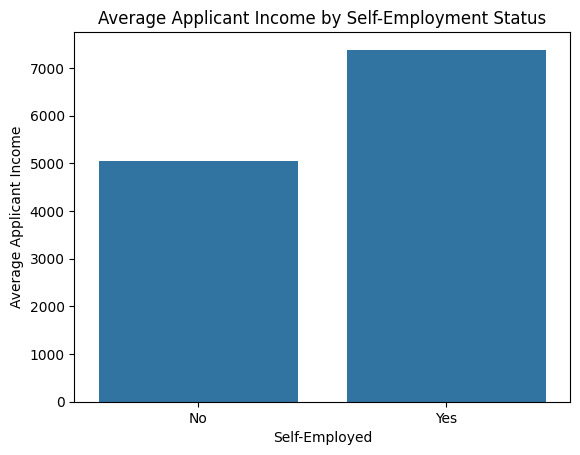

In [40]:

# Calculate average income by self-employment status
average_income_by_self_employed = df.groupby('Self_Employed')['ApplicantIncome'].mean()

# Create a bar plot using seaborn
sns.barplot(x=average_income_by_self_employed.index, y=average_income_by_self_employed.values)
plt.xlabel("Self-Employed")
plt.ylabel("Average Applicant Income")
plt.title("Average Applicant Income by Self-Employment Status")
plt.show()

In [41]:


# Calculate average income by self-employment status
average_income_by_self_employed = df.groupby('Self_Employed')['ApplicantIncome'].mean()

# Function to fill missing values in 'Self_Employed'
def fill_self_employed(row):
    if pd.isnull(row['Self_Employed']):
        if row['ApplicantIncome'] > average_income_by_self_employed.loc['Yes']:
            return 'Yes'
        else:
            return 'No'
    else:
        return row['Self_Employed']

# Apply the function to fill missing values
df['Self_Employed'] = df.apply(fill_self_employed, axis=1)

In [42]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

<ipython-input-42-1edba570fa7c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [43]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [44]:
df['Credit_History'] = df['Credit_History'].fillna('0')

In [45]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)

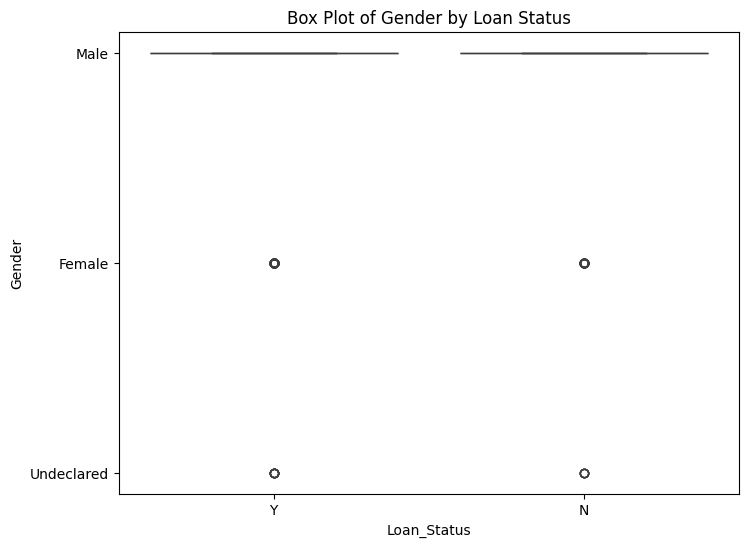

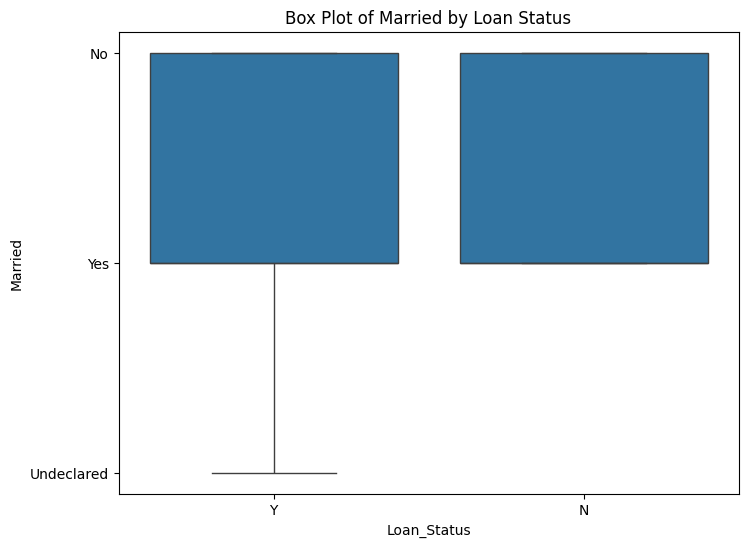

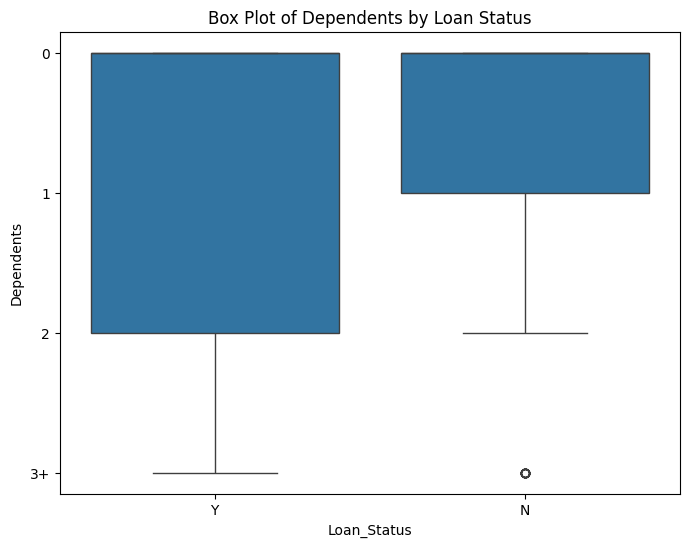

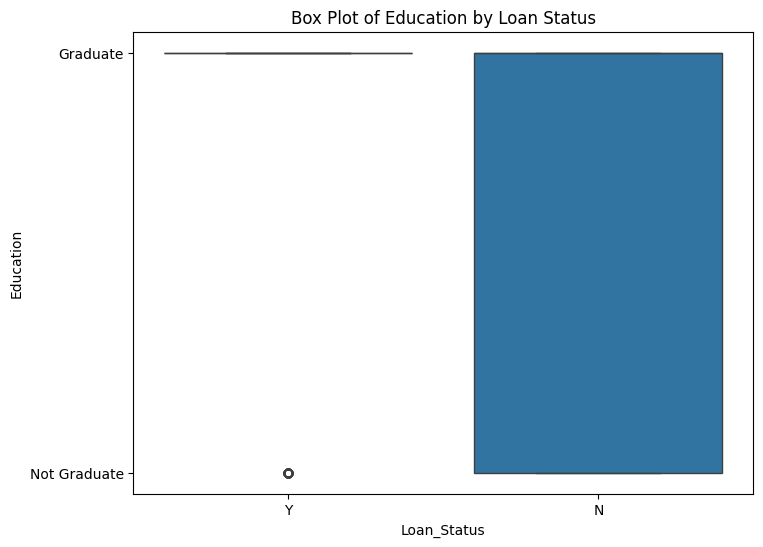

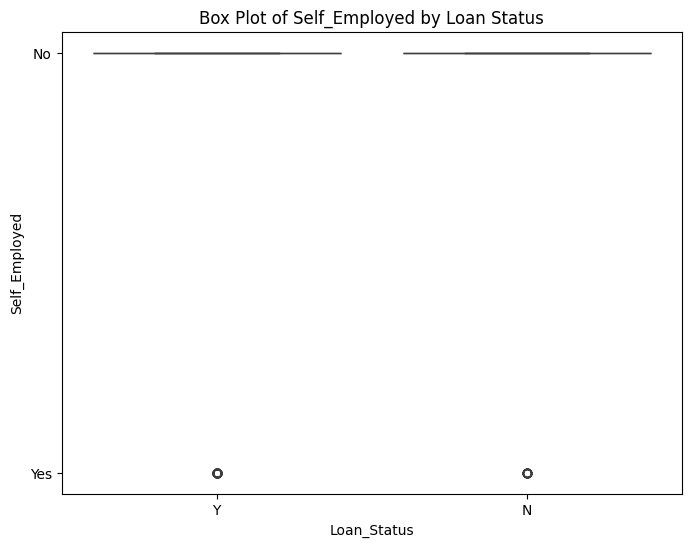

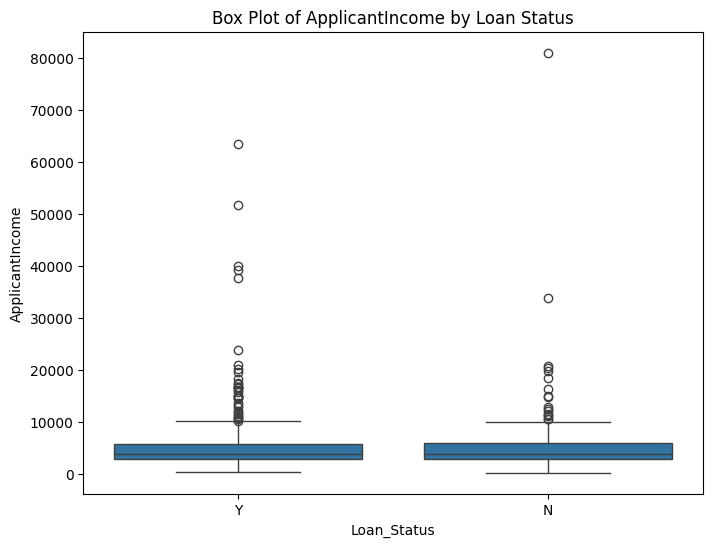

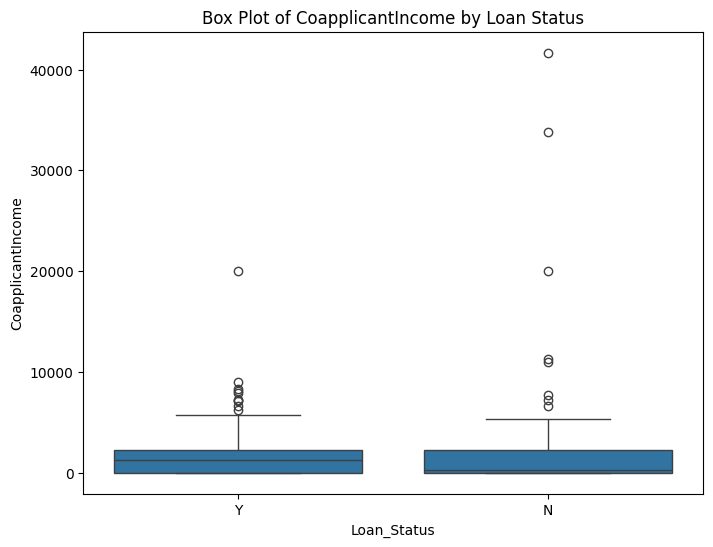

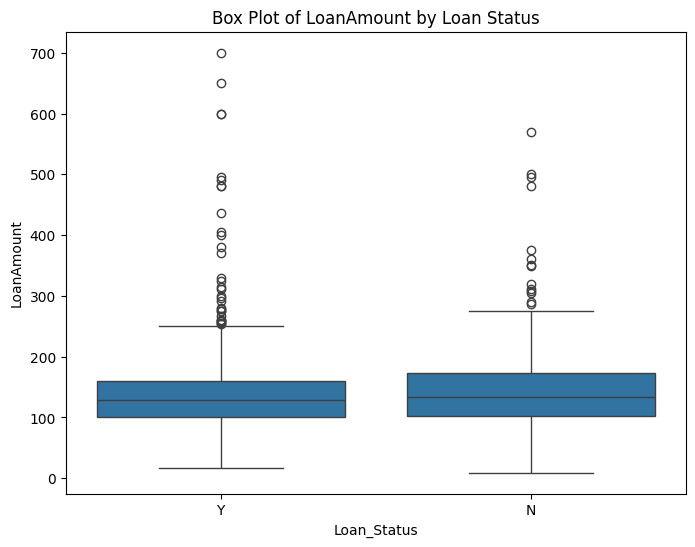

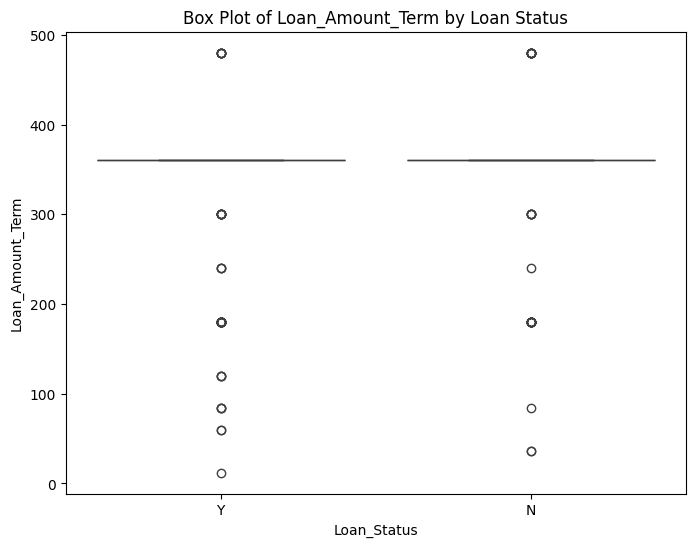

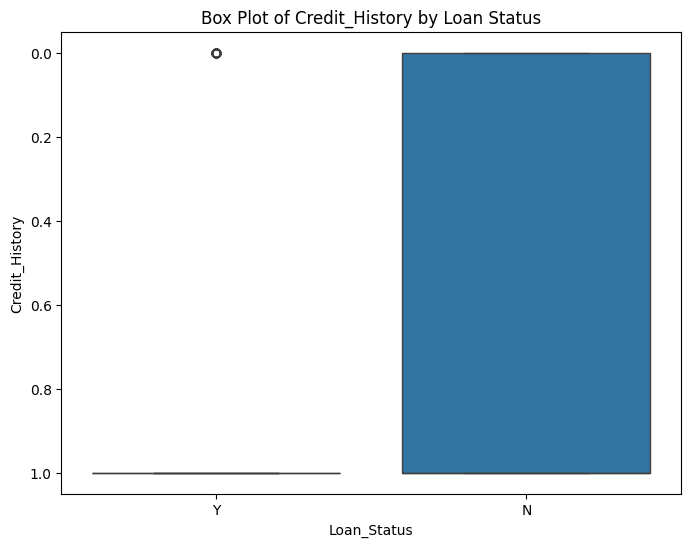

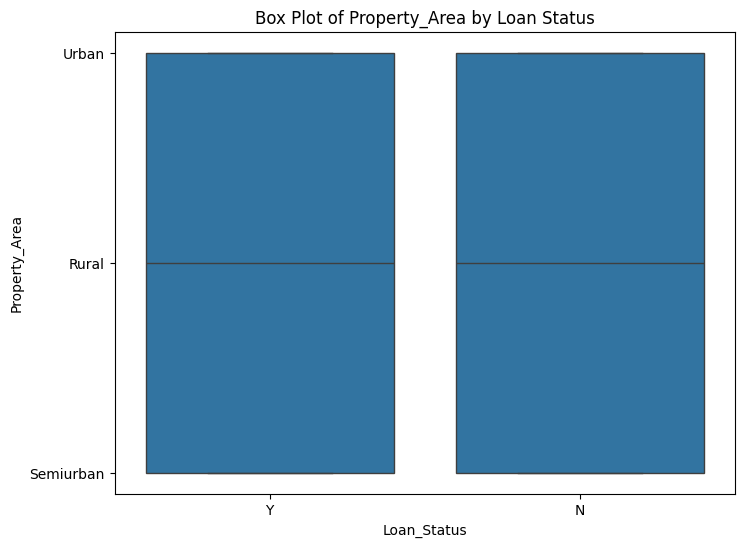

In [22]:


#  DataFrame and 'Loan_Status' is the target variable
for column in df.columns:
    if column != 'Loan_Status':  # Exclude the target variable itself
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.boxplot(x='Loan_Status', y=column, data=df)
        plt.title(f'Box Plot of {column} by Loan Status')
        plt.show()

In [25]:
# Example filter for both conditions
filtered_df = df[
    ((df['ApplicantIncome'] > 50000) & (df['Loan_Status'] == 'Y')) |
    ((df['ApplicantIncome'] > 30000) & (df['Loan_Status'] == 'N'))
]

# Instead of accessing 'Loan_ID', which was dropped, you can display the index:
print(filtered_df.index)

Index([171, 183, 333, 409], dtype='int64')


In [26]:
# Filter for LoanAmount > 550 and Loan_Status == 'Y'
index_y = df[(df['LoanAmount'] > 550) & (df['Loan_Status'] == 'Y')].index

# Filter for LoanAmount > 510 and Loan_Status == 'N'
index_n = df[(df['LoanAmount'] > 510) & (df['Loan_Status'] == 'N')].index

# Print the indices
print("Indices where LoanAmount > 550 and Loan_Status == 'Y':", index_y)
print("Indices where LoanAmount > 510 and Loan_Status == 'N':", index_n)

Indices where LoanAmount > 550 and Loan_Status == 'Y': Index([130, 155, 171, 561], dtype='int64')
Indices where LoanAmount > 510 and Loan_Status == 'N': Index([369], dtype='int64')


In [27]:
# List of indices to drop
indices_to_drop = [171, 183, 333, 409, 130, 155, 171, 561, 369]

# Drop the rows corresponding to the indices
df.drop(indices_to_drop, axis=0, inplace=True)

# Reset the index (optional)
df.reset_index(drop=True, inplace=True)

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [31]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame

# 1. Data Preprocessing
# Convert categorical features to numerical using Label Encoding
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

# Convert 'Credit_History' to numeric, handling potential non-numeric values
# This will force any non-numeric values to NaN, which can be imputed or dropped later.
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')

# If you want to impute missing values in 'Credit_History':
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True) # This replace NaN with the most frequent values

# 2. Split data into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')

<ipython-input-31-1678d9841712>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True) # This replace NaN with the most frequent values
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

Logistic Regression Accuracy: 0.8114754098360656
Random Forest Accuracy: 0.7704918032786885
XGBoost Accuracy: 0.7622950819672131


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters for Logistic Regression: {best_params}")

# 5. Model Training and Evaluation with Best Hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, **best_params),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.8114754098360656
Random Forest Accuracy: 0.7704918032786885
XGBoost Accuracy: 0.7622950819672131
